In [42]:
# -*- coding: utf-8 -*-
"""
Created on Thu Nov  9 14:12:53 2017

@author: charles
"""

import pickle
import numpy as np
from scipy.stats import chi2

import sklearn

from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import make_moons, make_circles, make_classification
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.gaussian_process import GaussianProcessClassifier
from sklearn.gaussian_process.kernels import RBF
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier, AdaBoostClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.discriminant_analysis import QuadraticDiscriminantAnalysis
from sklearn.ensemble import BaggingClassifier
import matplotlib.pyplot as plt
from scipy.signal import gaussian

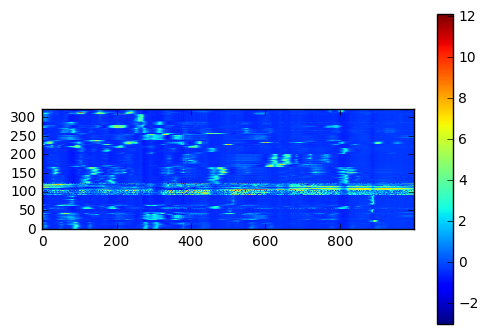

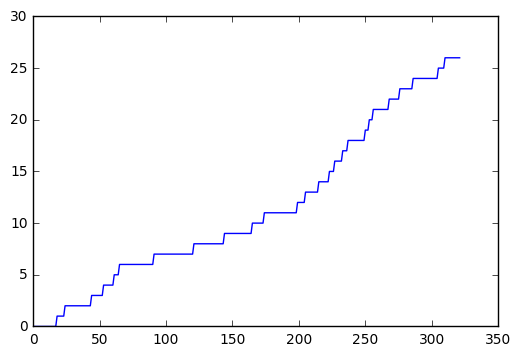

Il y a 322 données réparties sur 27 classes


In [43]:
#
# Data importation
#

X = np.load('/Users/alwardas/Downloads/obs-2.npy')
X_sc = StandardScaler().fit(X) # standard scaling
X = X_sc.transform(X)
y = pickle.load( open( "./data/labels.pkl", "rb" ) )

plt.imshow(X,cmap='jet')
plt.gca().invert_yaxis()
plt.colorbar()
plt.show()
plt.plot(y)

plt.show()
print("Il y a "+str(len(y))+" données réparties sur 27 classes")

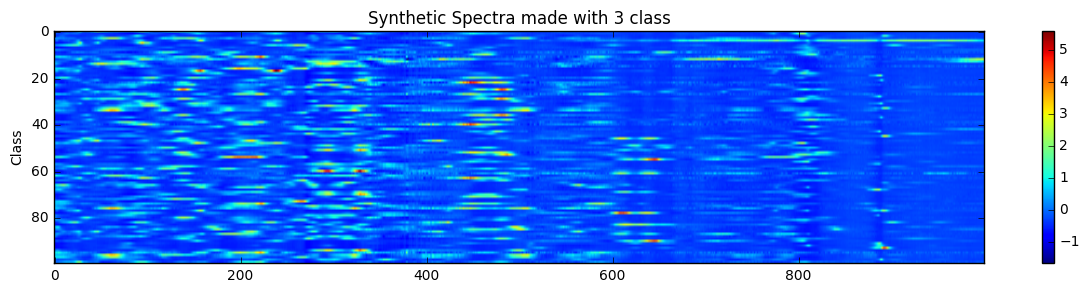

In [44]:
somme=np.zeros((100,1000))
classe=[]
poids=[]
Ybis=np.zeros((100,3,2))
#Generate 100 synthetic data
for ii in range(100):
    classes=np.random.randint(27,size=[3,])
    #print(classes)
    #store the classes used for each synthetic data 
    classe.append(classes)
    Ybis[ii,:,0]=classes
    
    #For each classe chosen randomly, random selection of a signal
    elements=[]
    for i in range(len( classes)):
        e1=y.index(classes[i])
        if classes[i]+1 == 27:
            e2=321
        else:
            e2=y.index(classes[i]+1)
    
        elements.append(np.random.choice(np.arange(e1,e2)))
        
    tosomme=np.zeros((len(elements),1000))
    rand=np.random.rand(3)
    rand=rand/np.sum(rand)
    #Store the weight of each class in the synthetic data
    poids.append(rand)
    Ybis[ii,:,1]=rand
    
    for i in range(len(elements)):
    
        tosomme[i,:]=X[elements[i],:]*rand[i]
    
    somme[ii,:]=np.sum(tosomme,axis=0)   
    
plt.figure(figsize=(15,3))
plt.imshow(somme,cmap='jet',aspect='auto')
plt.title('Synthetic Spectra made with 3 class')
plt.ylabel('Class')
plt.colorbar()
plt.show()

In [45]:
from collections import Counter
count=Counter(y)
count

Counter({0: 18,
         1: 6,
         2: 20,
         3: 9,
         4: 8,
         5: 4,
         6: 26,
         7: 30,
         8: 23,
         9: 21,
         10: 9,
         11: 25,
         12: 6,
         13: 10,
         14: 8,
         15: 4,
         16: 6,
         17: 4,
         18: 13,
         19: 3,
         20: 3,
         21: 12,
         22: 8,
         23: 10,
         24: 19,
         25: 5,
         26: 12})

In [46]:
mean=[]
std=[]
#Computation of mean and standard deviation of each class
for i in range(len(count)):
    e1=y.index(i)
    if i+1 == 27:
        e2=321
    else:
        e2=y.index(i+1)
    mean.append(np.mean(X[e1:e2],axis=0))
    std.append(np.std(X[e1:e2],axis=0))

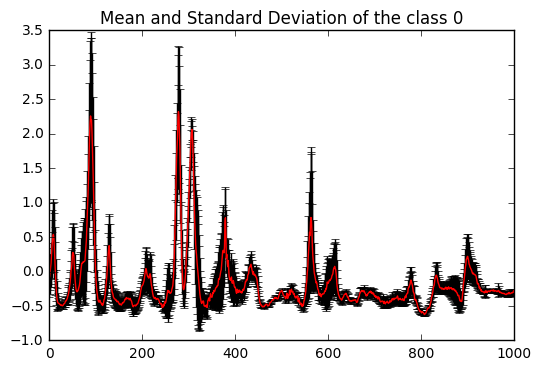

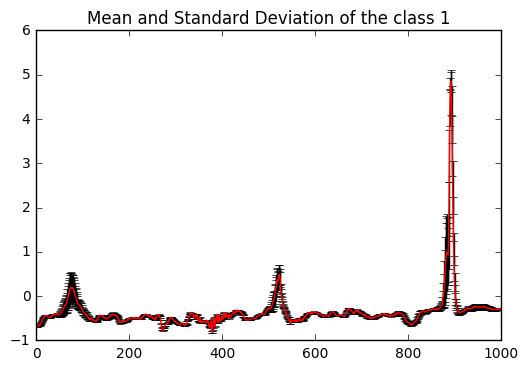

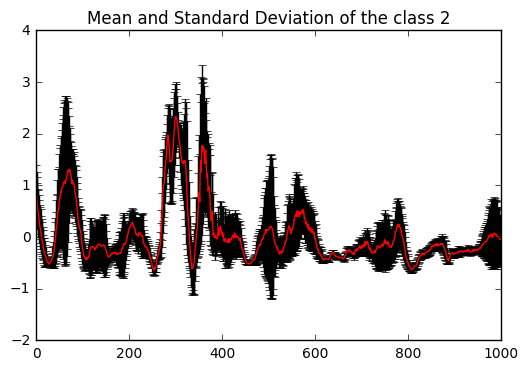

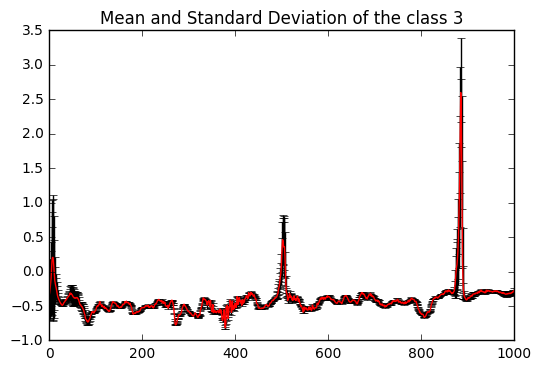

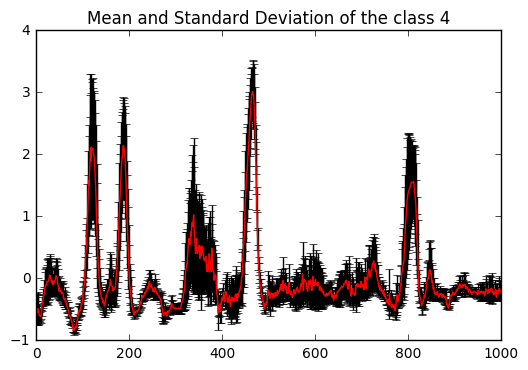

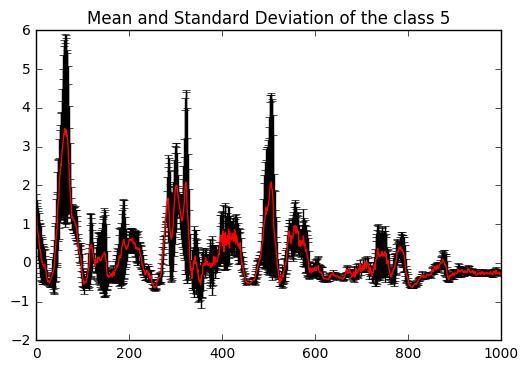

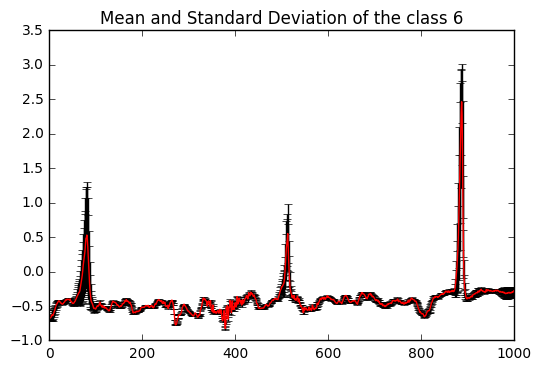

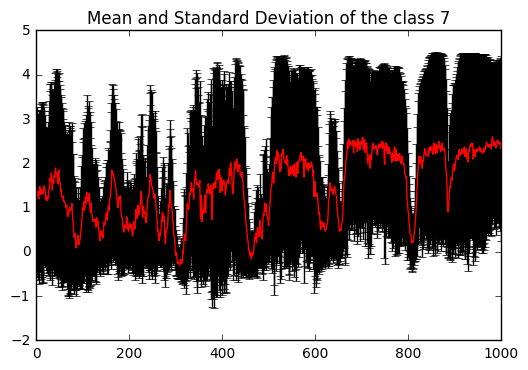

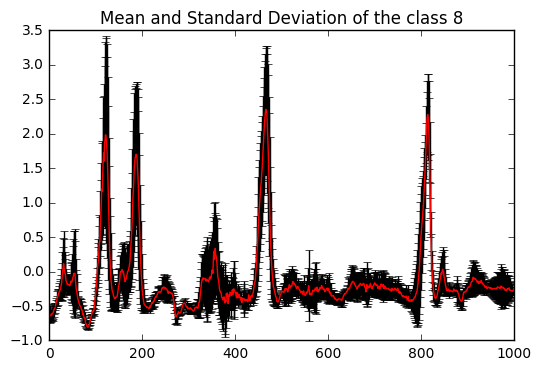

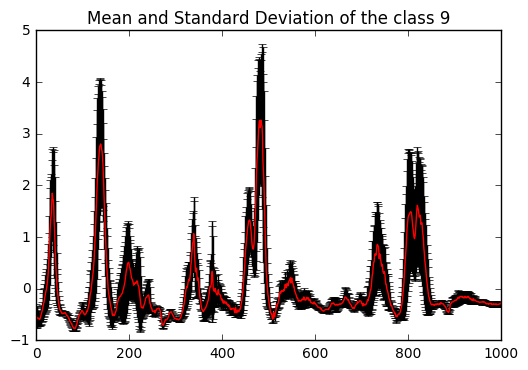

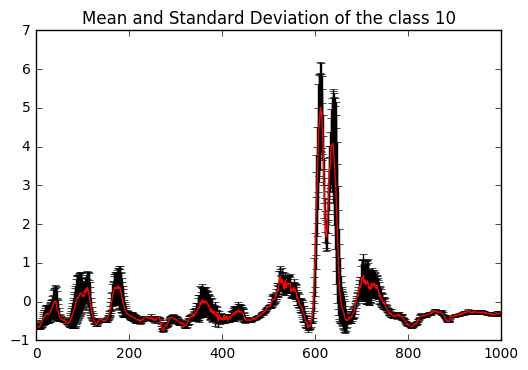

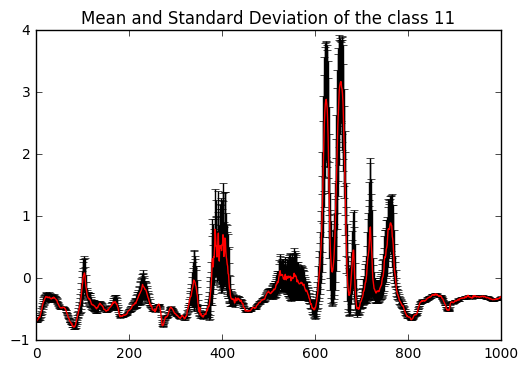

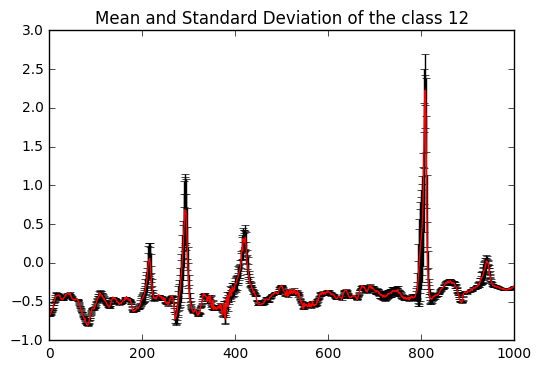

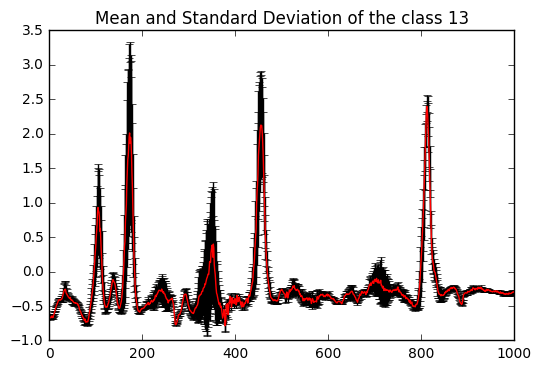

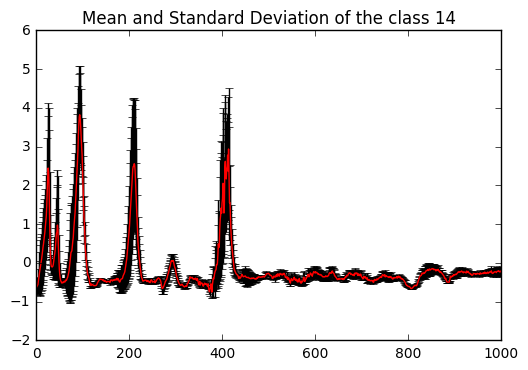

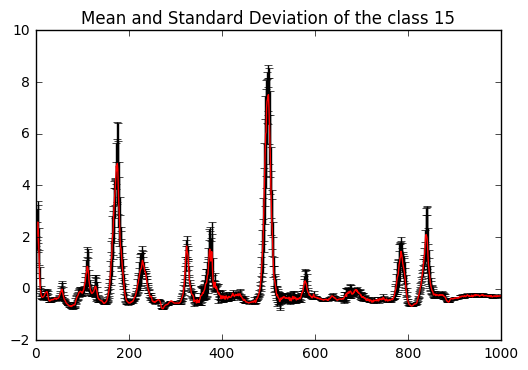

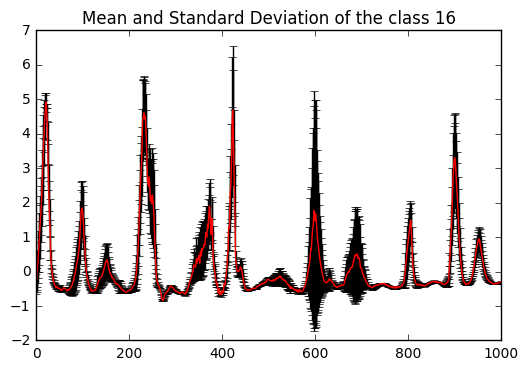

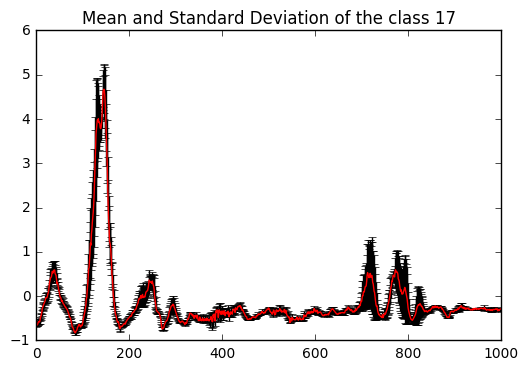

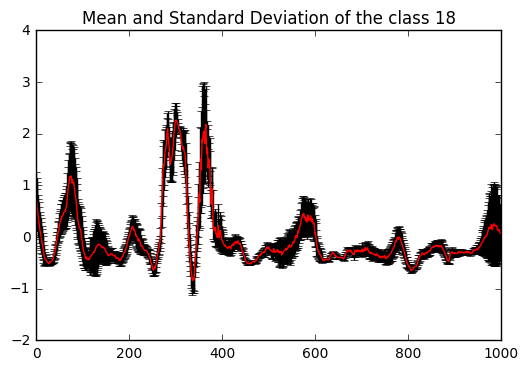

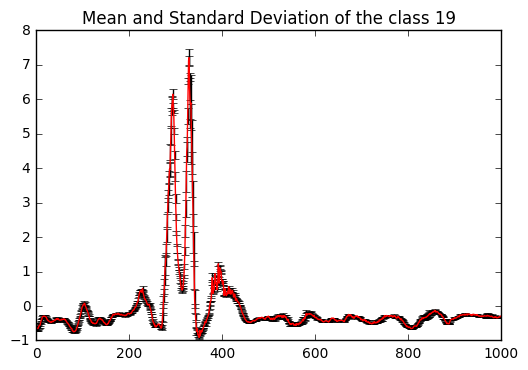

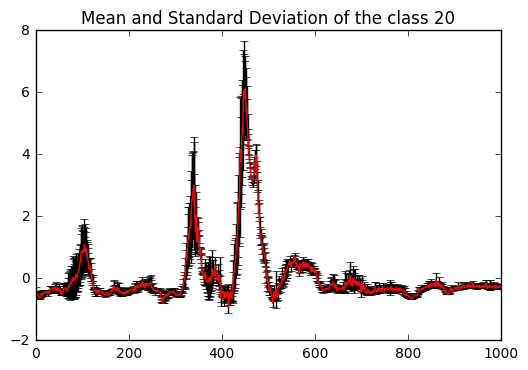

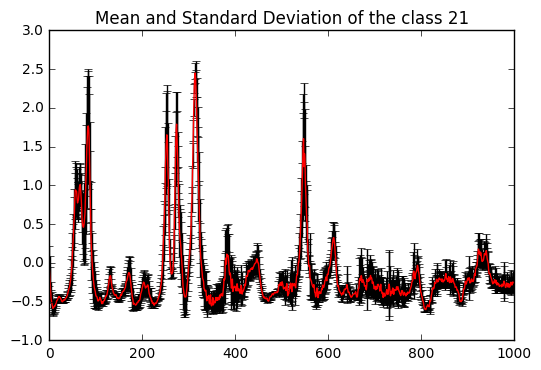

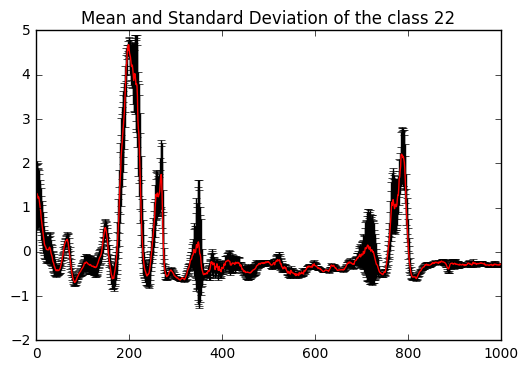

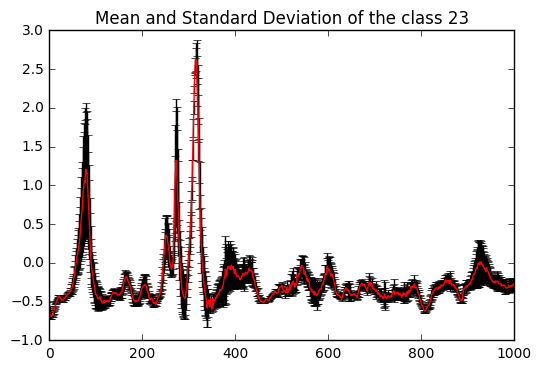

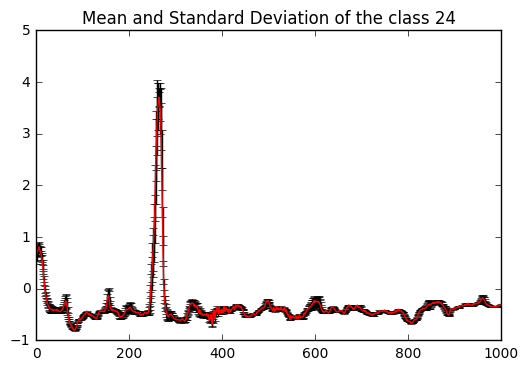

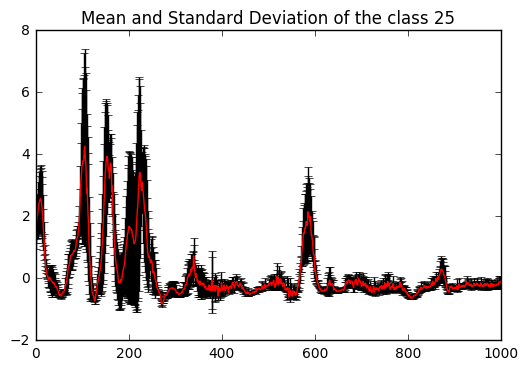

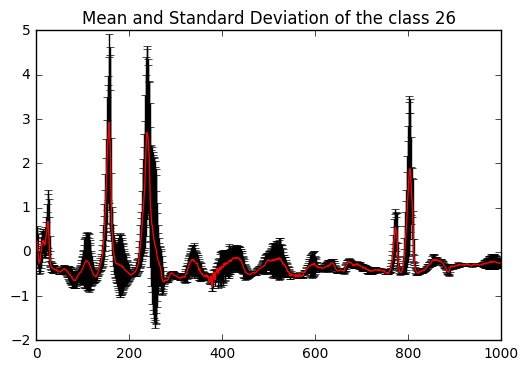

In [49]:

for i in range(len(count)):
    plt.figure(i)
    
    plt.errorbar(np.arange(1000),mean[i],yerr=std[i],elinewidth=1,color='r',mfc="k",ecolor="k")
    plt.title('Mean and Standard Deviation of the class '+str(i))
    plt.show()



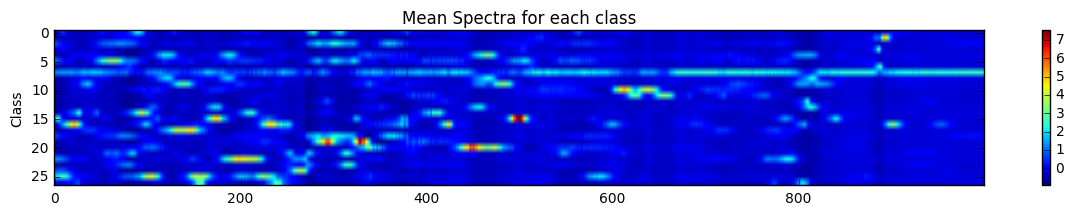

In [50]:
plt.figure(figsize=(15,2))
plt.imshow(mean,aspect='auto')
plt.ylabel('Class')
plt.title('Mean Spectra for each class')
plt.colorbar()
plt.show()

In [191]:
dx = (np.arange(600)[1]-np.arange(600)[0])/2.
dy = (x[1]-x[0])/2.
extent = [np.arange(600)[0]-dx, np.arange(600)[-1]+dx, x[-1]+dy, x[0]-dy]

In [192]:
matrices=[]
for iii in range(len(count)):
    test=np.zeros((len(x),600))
    for ii in range(600):
        mu=mean[iii][ii]

        sigma=std[iii][ii]
        for i in range(len(x)):
            #test.append(np.exp(-(x[i]-mu)**2/(2*sigma**2))*1/(sigma*np.sqrt(2*np.pi)))
            test[i,ii]=np.exp(-((x[i]-mu)**2/(2*sigma**2)))*1/(sigma*np.sqrt(2*np.pi))
            test[i,ii]=np.exp(-((x[i]-mu)/sigma)**2/2) / sigma / np.sqrt(2 * np.pi)
    matrices.append(test)

/usr/local/lib/python3.6/site-packages/ipykernel/__main__.py:2: RuntimeWarning: divide by zero encountered in log
  from ipykernel import kernelapp as app


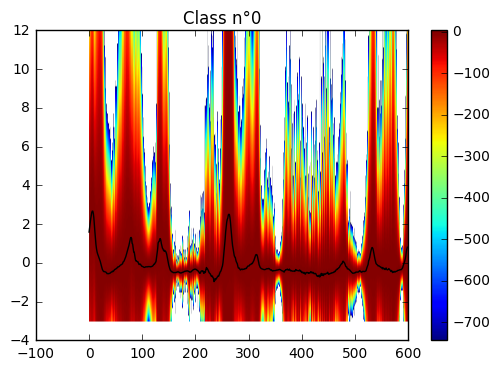

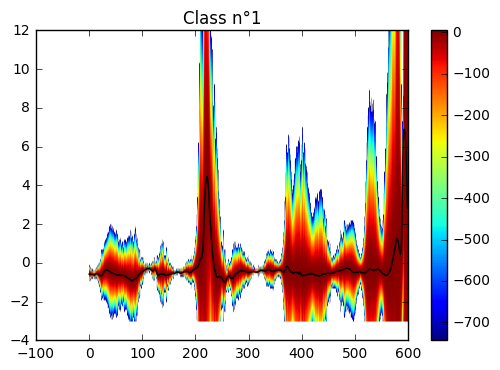

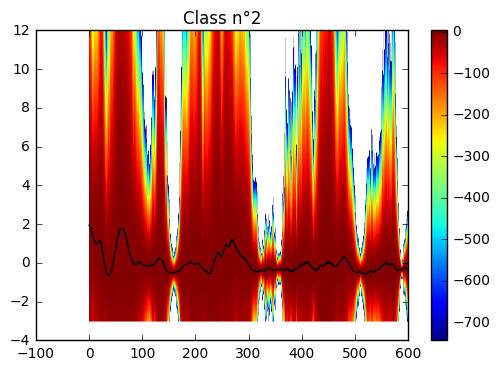

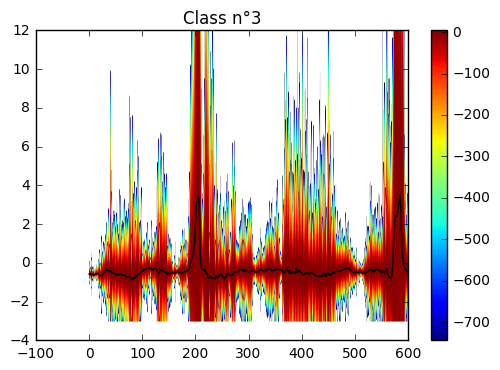

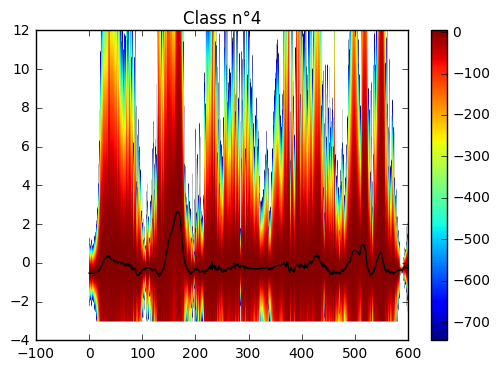

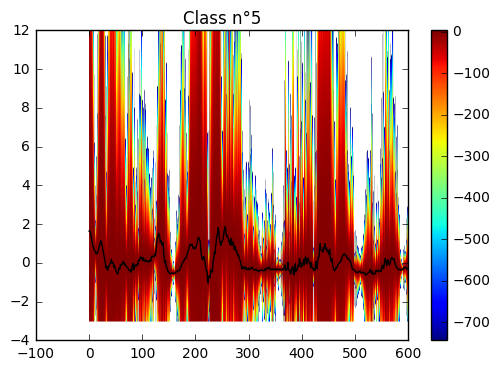

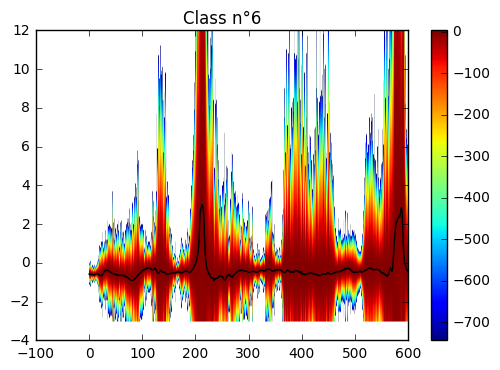

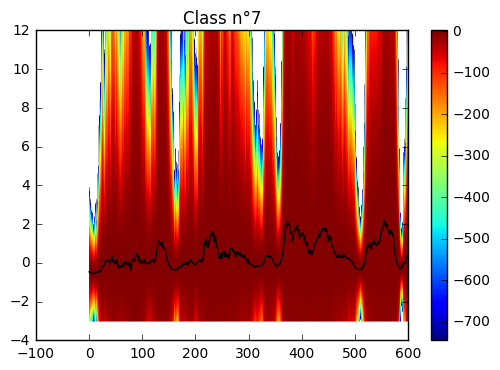

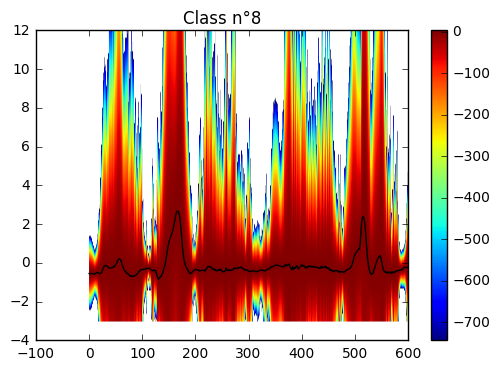

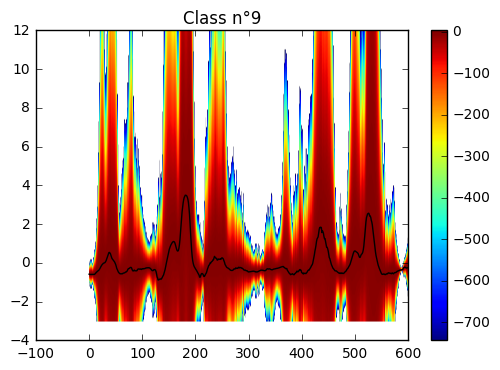

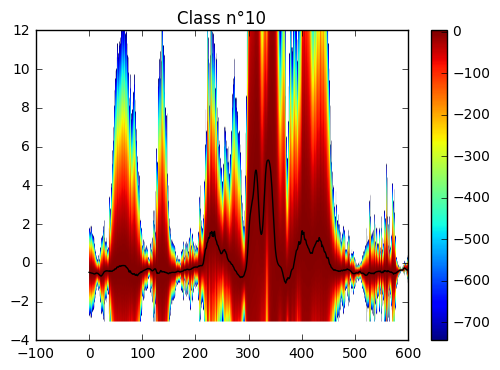

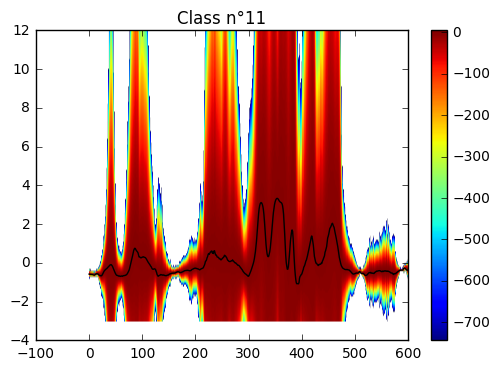

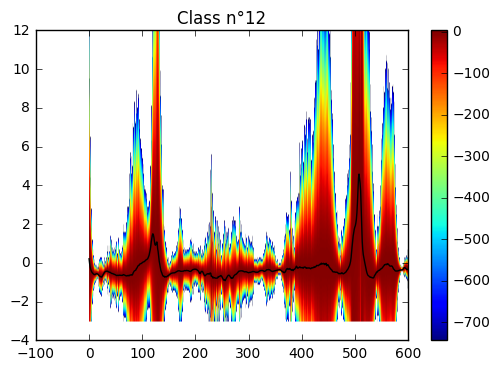

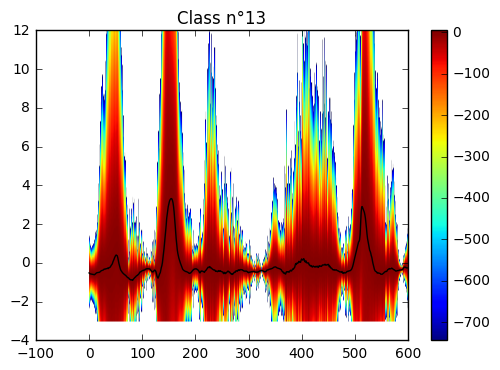

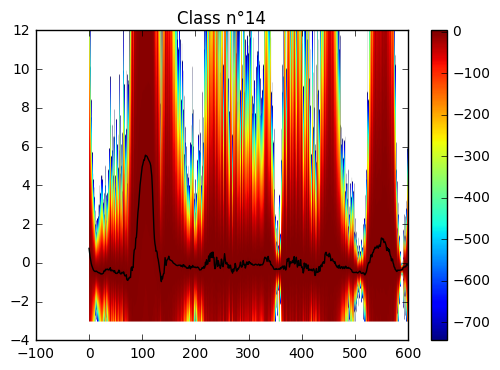

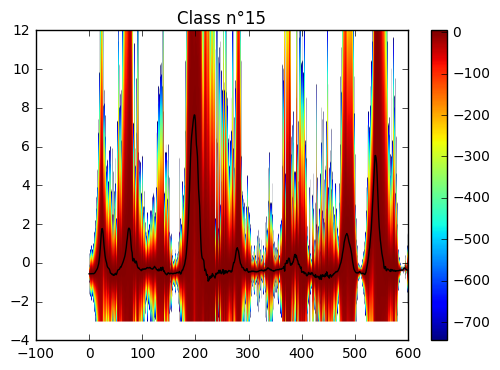

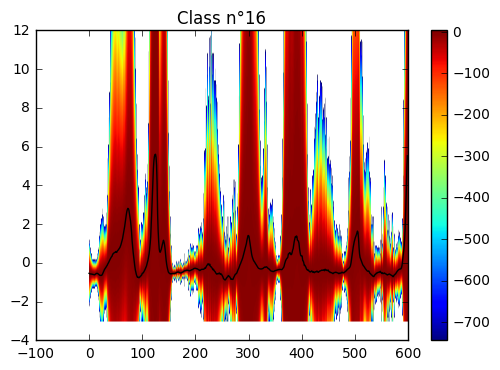

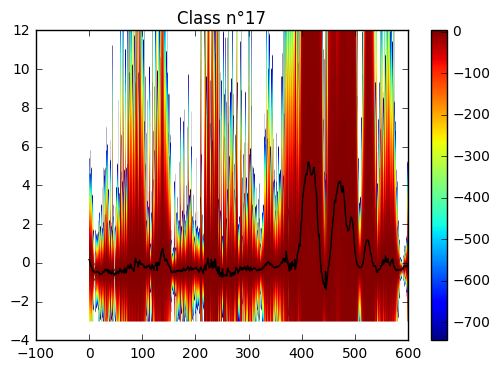

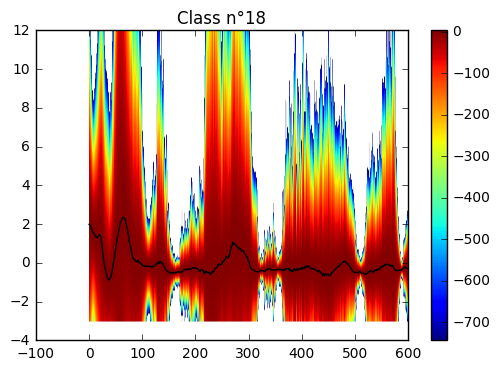

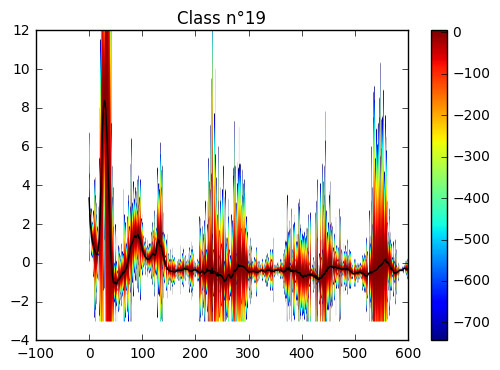

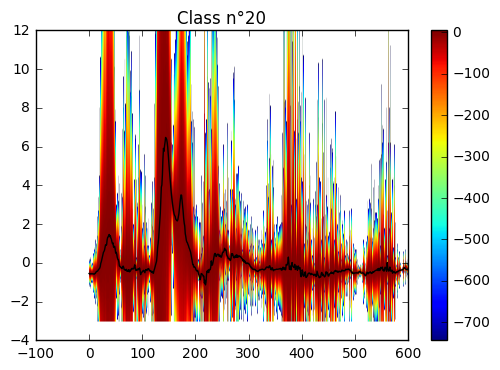

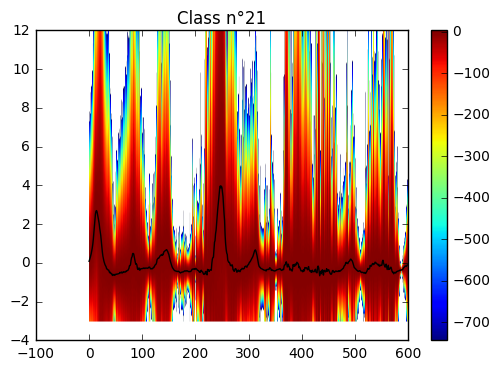

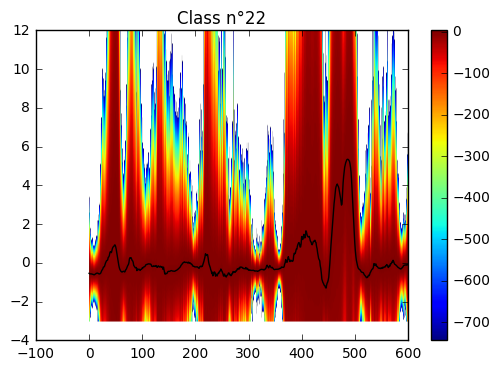

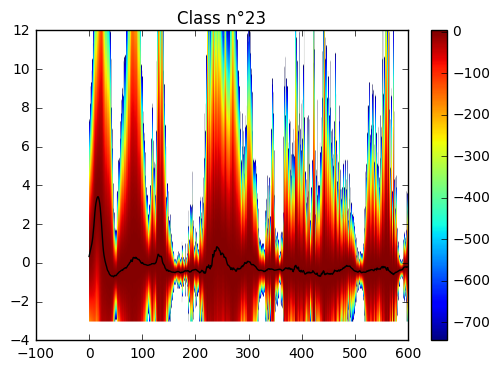

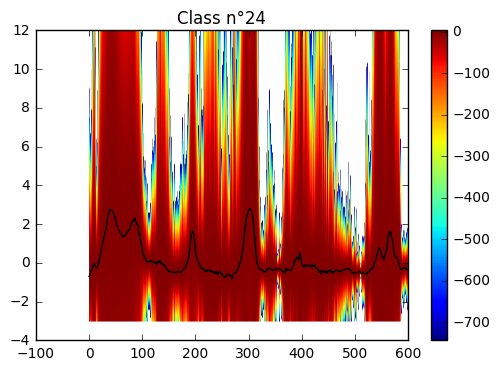

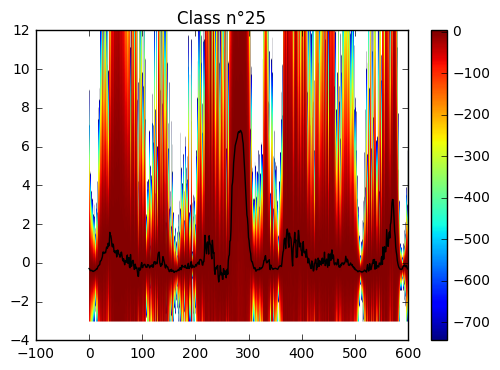

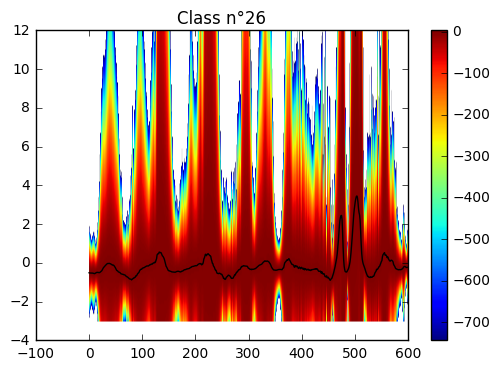

In [193]:
for i in range(len(count)):
    plt.imshow(np.log(matrices[i]),aspect='auto',extent=extent)
    plt.title('Class n°'+str(i))
    plt.colorbar()

    #plt.yticks(np.arange(len(x))[::10],x[::10])
    plt.gca().invert_yaxis()
    plt.plot(np.arange(600),mean[i],'k')
    plt.show()

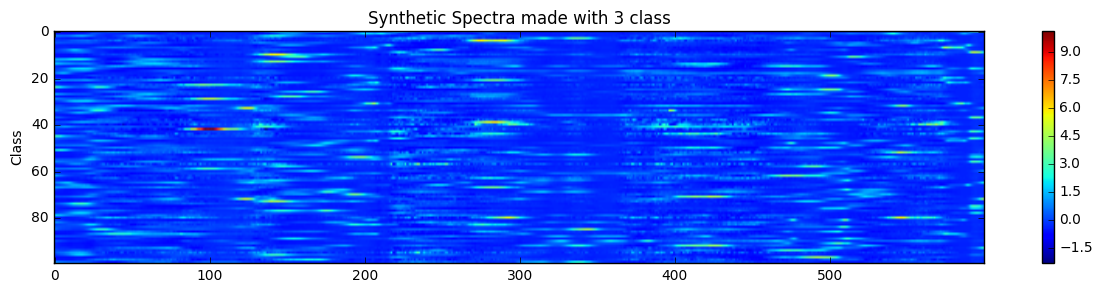

In [7]:
plt.figure(figsize=(15,3))
plt.imshow(somme,cmap='jet',aspect='auto')
plt.title('Synthetic Spectra made with 3 class')
plt.ylabel('Class')
plt.colorbar()
plt.show()

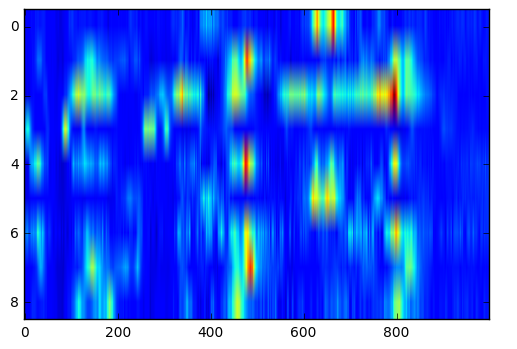

In [57]:
import glob
obs=np.load(glob.glob('/Users/alwardas/Downloads/obs.npy')[0])
obs = X_sc.transform(obs)
arrayLbl=np.load(glob.glob('/Users/alwardas/Downloads/*.npy')[0])
lbl=pickle.load(open(glob.glob('/Users/alwardas/Downloads/*.pkl')[0],'rb'))
plt.imshow(obs,aspect='auto')
plt.show()

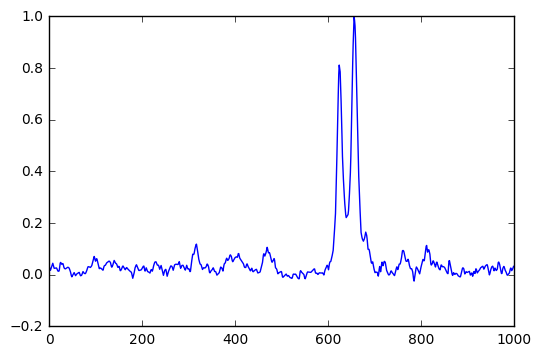

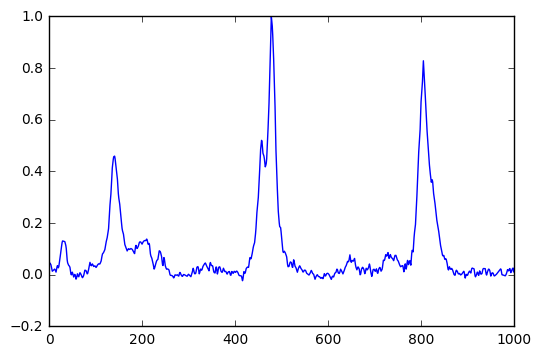

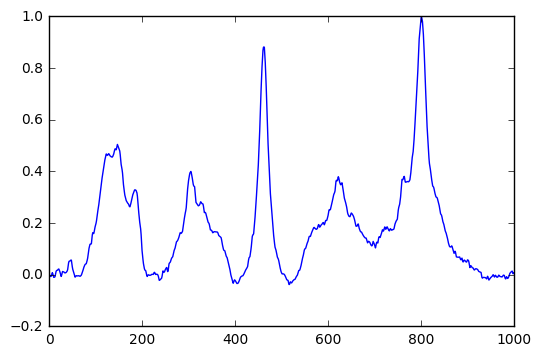

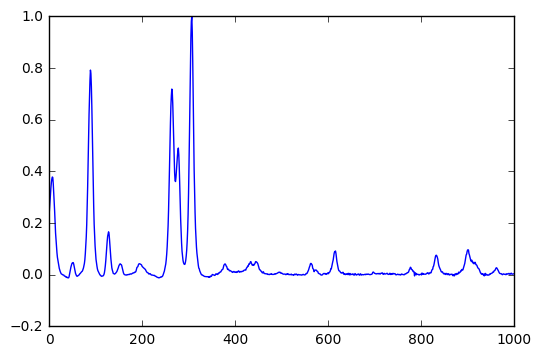

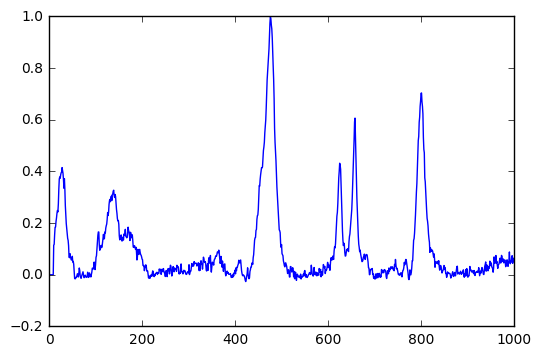

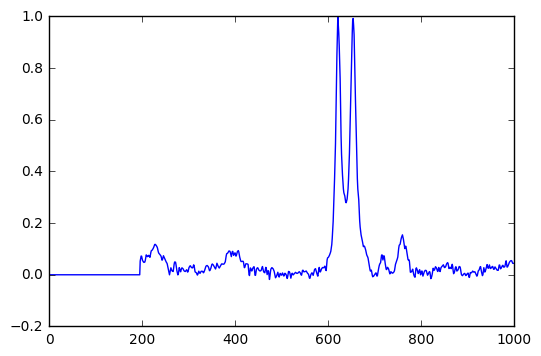

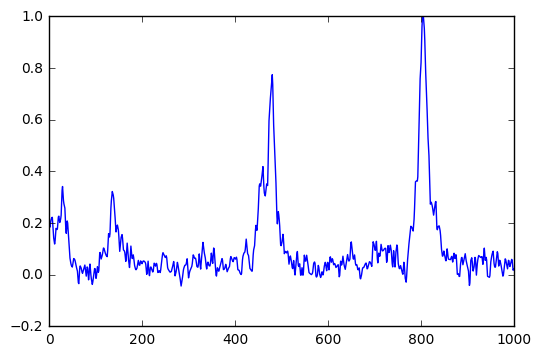

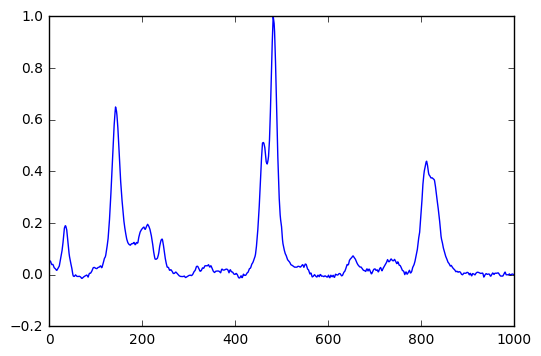

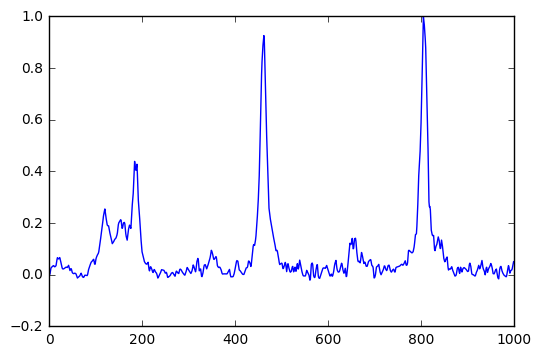

In [26]:
for i in range(9):
    plt.plot(obs[i])
    plt.show()

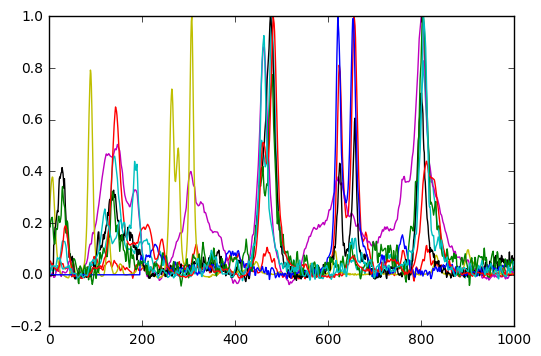

In [33]:
plt.plot(obs.transpose())
plt.show()

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


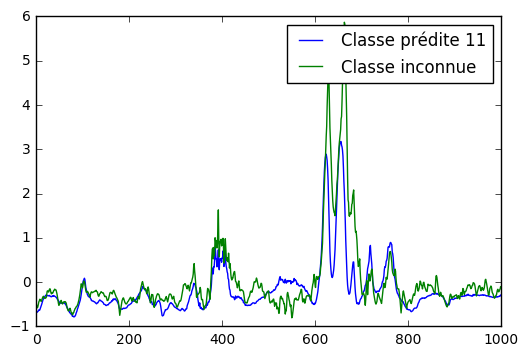

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


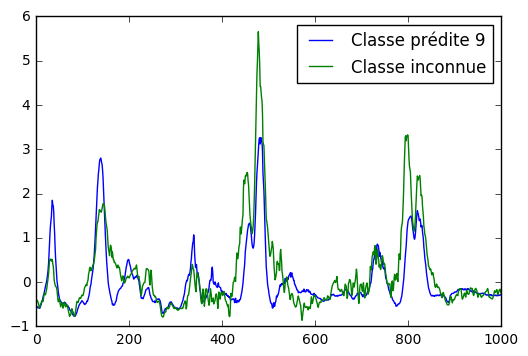

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


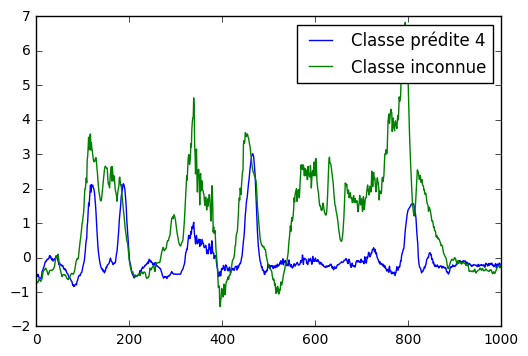

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


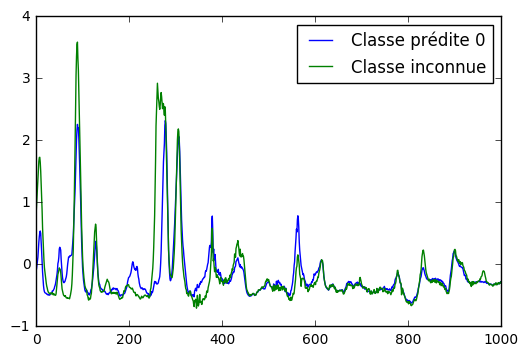

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


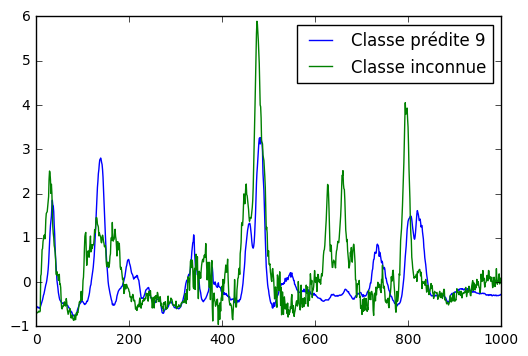

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


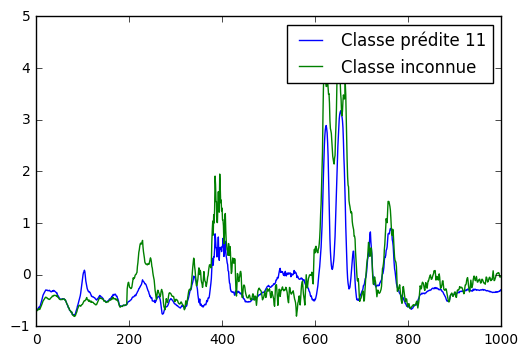

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


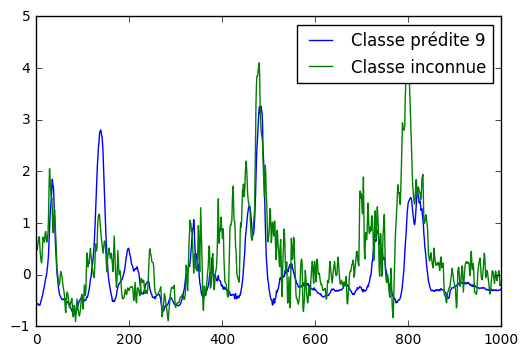

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


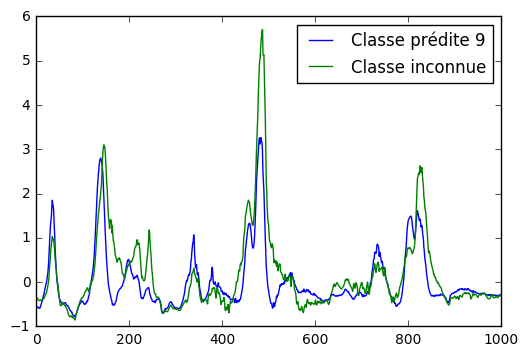

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


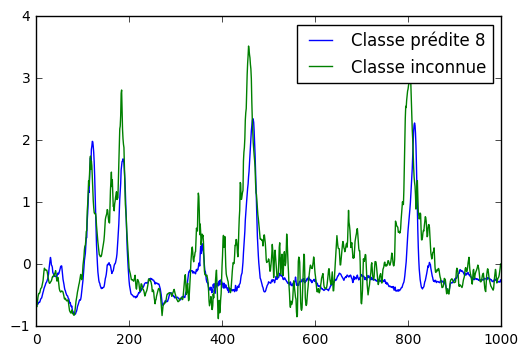

In [78]:
model= SVC(kernel="linear", C=0.025)
model.fit(X, y)
new=np.zeros((9,1000))
prediction=[]
for i in range(len(obs)):
    
    a=(model.predict(obs[i]))
    prediction.append(a[0])
    plt.plot(mean[a[0]],label='Classe prédite '+str(a[0]))
    plt.plot(obs[i],label='Classe inconnue')
    plt.legend()
    plt.show()
    new[i]=(obs[i]-mean[a[0]])

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


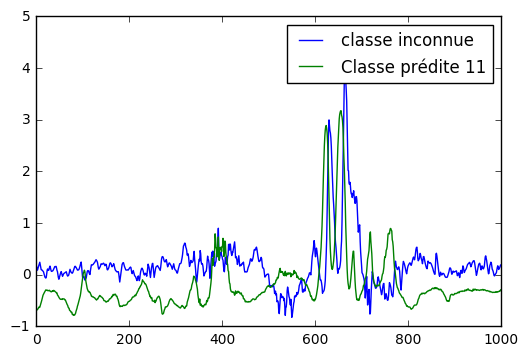

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


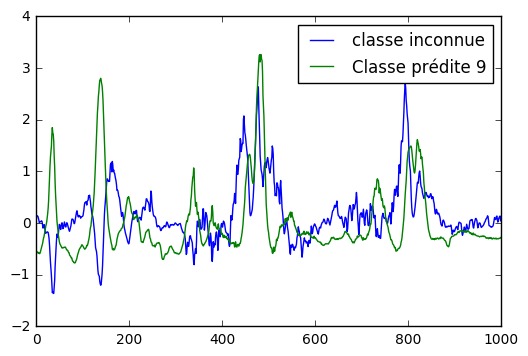

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


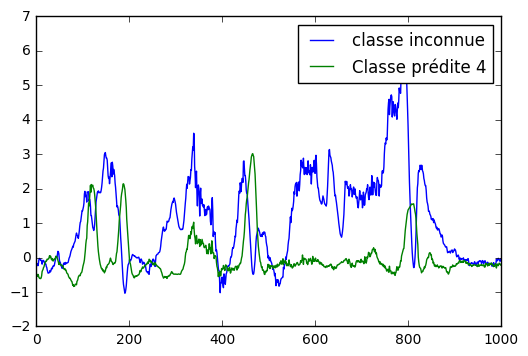

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


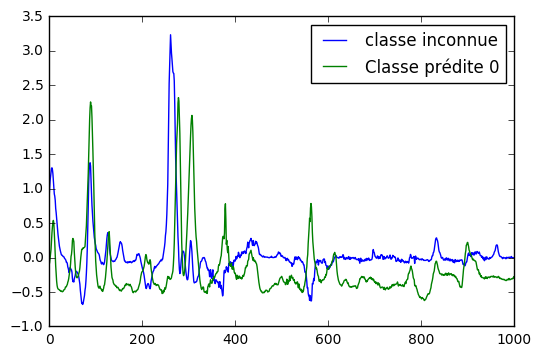

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


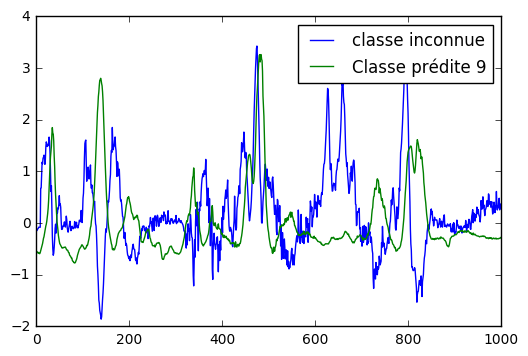

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


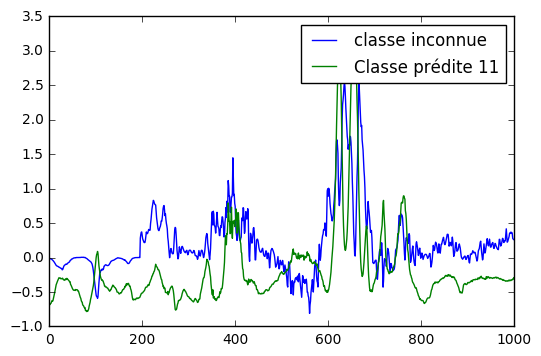

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


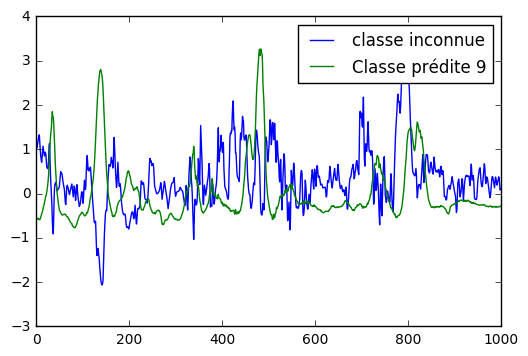

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


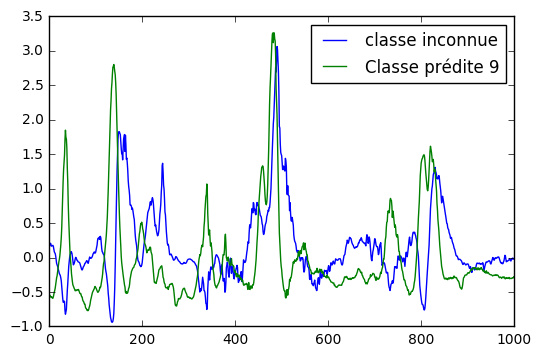

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


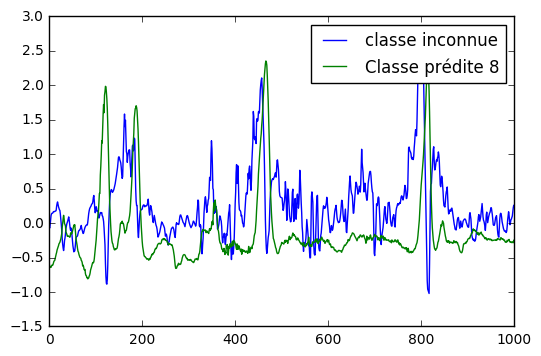

In [71]:
for i in range(len( new)):
    
    
    a=(model.predict(obs[i]))
    plt.plot(new[i],label='classe inconnue')
    plt.plot(mean[a[0]],label='Classe prédite '+str(a[0]))
    plt.legend()
    plt.show()

0


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


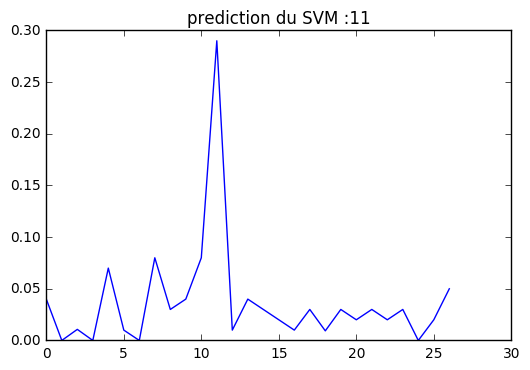

1


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


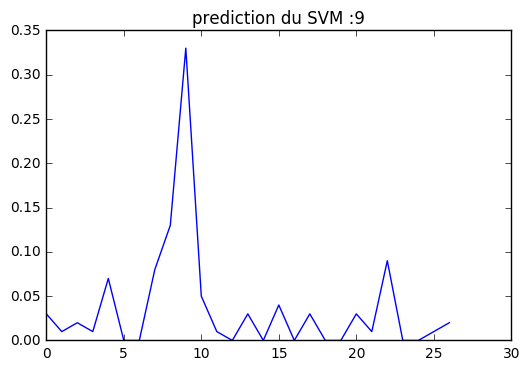

2


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


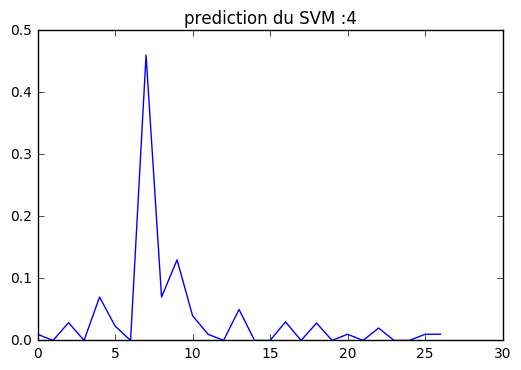

3


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


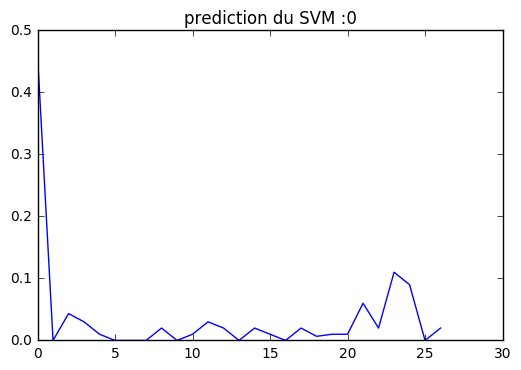

4


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


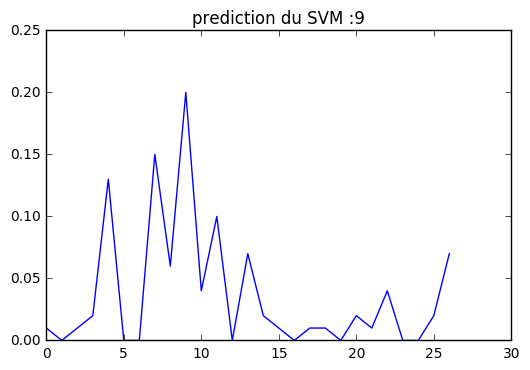

5


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


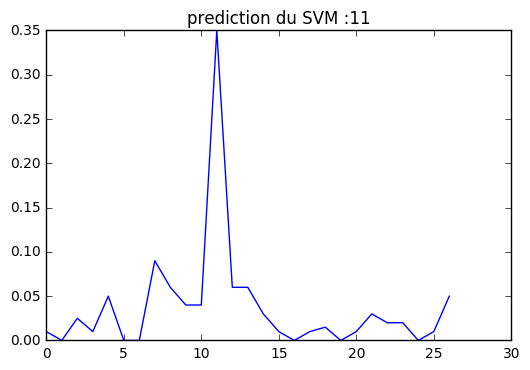

6


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


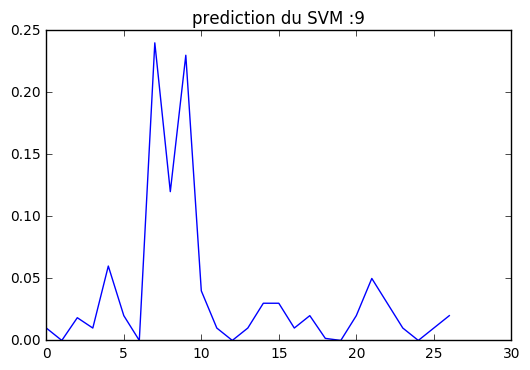

7


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


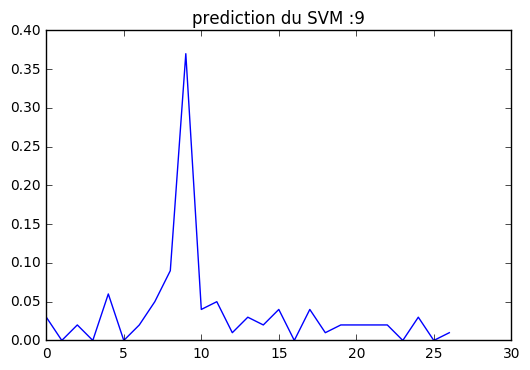

8


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


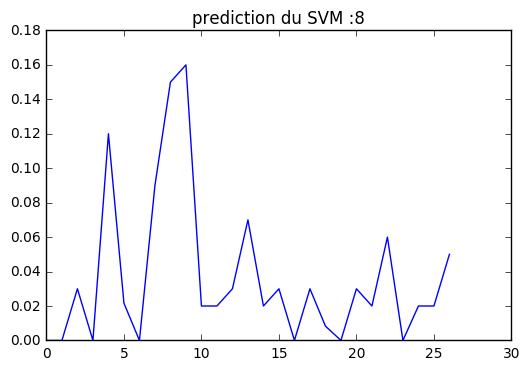

In [88]:
model= RandomForestClassifier(max_depth=15, n_estimators=100, max_features=2)
model.fit(X, y)
for i in range (9):
    print(i)
    plt.plot(model.predict_proba(obs[i])[0])
    plt.title('prediction du SVM :'+str(prediction[i]))
    plt.show()

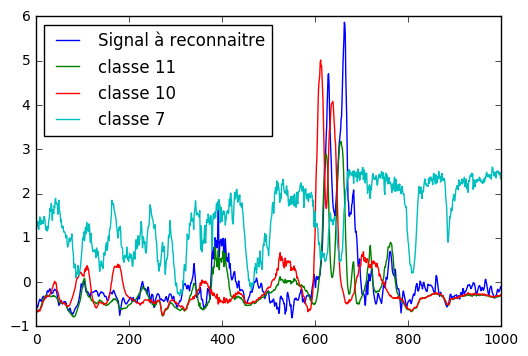

In [87]:
#0,3 et 4 sont mélangés
#0 et 5 
#0 classe : 10 11
#3 classe : 0 24
#4 classe : 11 9
#5 classe : 9 10
plt.plot(obs[0],label='Signal à reconnaitre')
plt.plot(mean[11],label='classe 11')
plt.plot(mean[10],label='classe 10')
plt.plot(mean[7],label='classe 7')
plt.legend(loc=0)
plt.show()

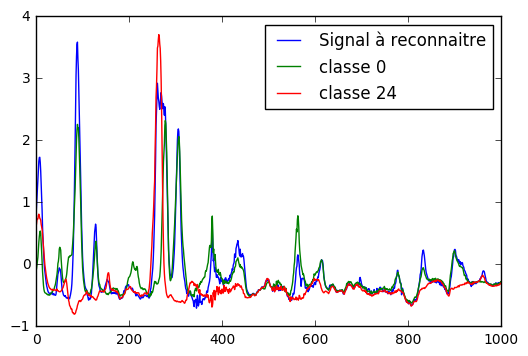

In [84]:
plt.plot(obs[3],label='Signal à reconnaitre')
plt.plot(mean[0],label='classe 0')
plt.plot(mean[24],label='classe 24')
plt.legend(loc=0)
plt.show()

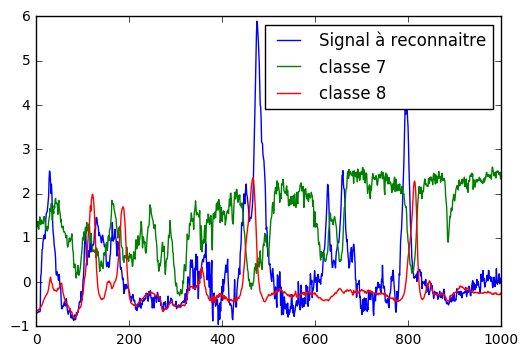

In [86]:
plt.plot(obs[4],label='Signal à reconnaitre')
plt.plot(mean[7],label='classe 7')
plt.plot(mean[8],label='classe 8')
plt.legend(loc=0)
plt.show()

[14 17  5]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


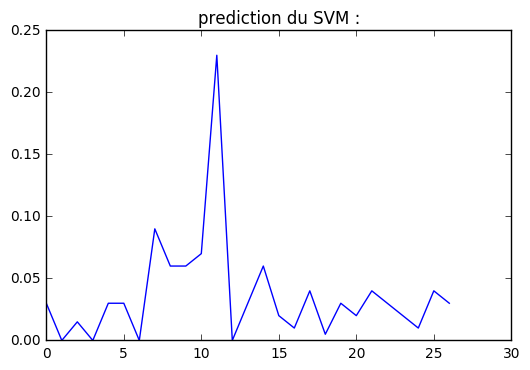

[26 13 20]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


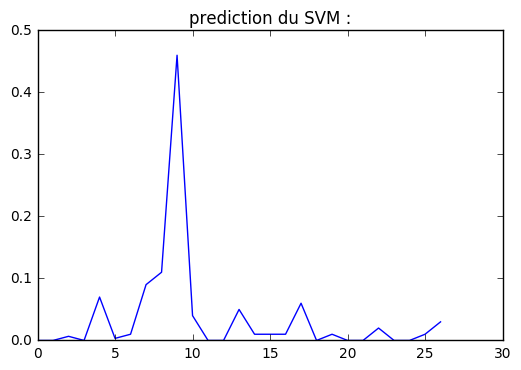

[12  0  1]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


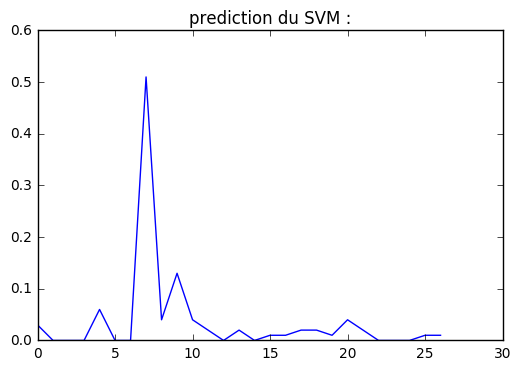

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 5  6 17]


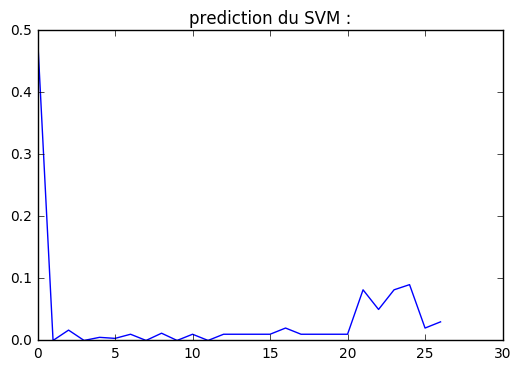

[ 7 26  0]


/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


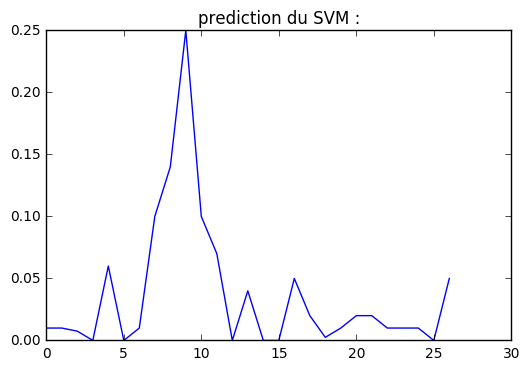

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[14 12 23]


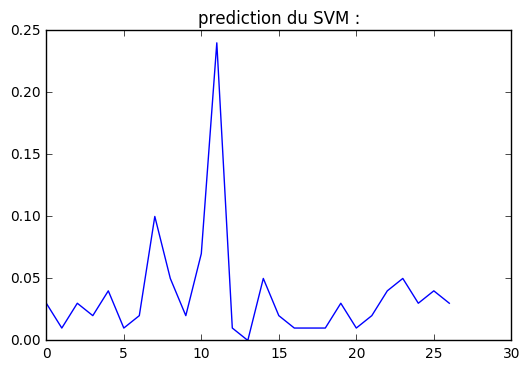

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[ 9 16 24]


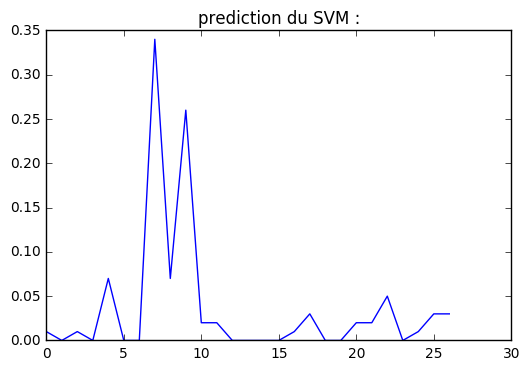

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[23 12  8]


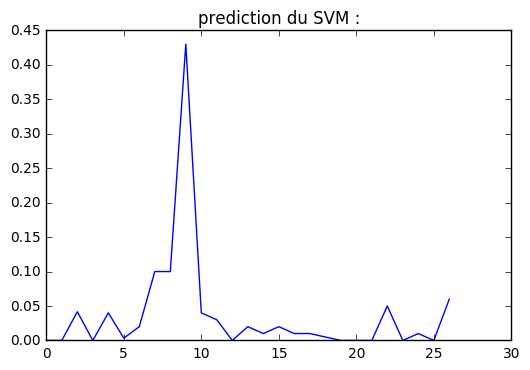

/usr/local/lib/python3.6/site-packages/sklearn/utils/validation.py:395: DeprecationWarning: Passing 1d arrays as data is deprecated in 0.17 and will raise ValueError in 0.19. Reshape your data either using X.reshape(-1, 1) if your data has a single feature or X.reshape(1, -1) if it contains a single sample.
  DeprecationWarning)


[13 24  2]


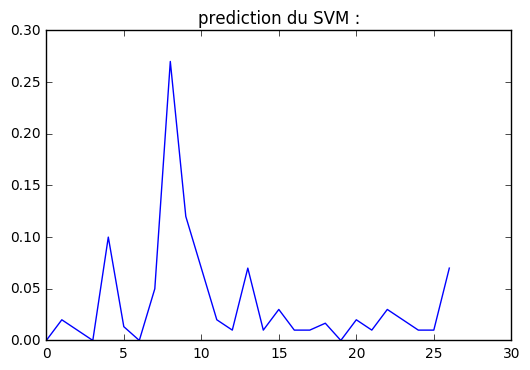

In [93]:
model= RandomForestClassifier(max_depth=15, n_estimators=100, max_features=2)
model.fit(X, y)
for i in range (9):
    #print(i)
    plt.plot(model.predict_proba(obs[i])[0])
    print(classe[i])
    plt.title('prediction du SVM :')
    plt.show()